Connected to Python 3.12.1


In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset
data = pd.read_csv("creditcard/creditcard_2023.csv")

# Separar recursos e rótulo
X = data.drop("Class", axis=1)  # 'Class' é a variável alvo (0: legítimo, 1: fraudulento)
y = data["Class"]

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balancear os dados usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calcular a Curva ROC e AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotar a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Avaliar o modelo com validação cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Acurácia média em Cross Validation: {np.mean(cv_scores):.4f}")

# Exibir a importância das variáveis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Exibir as features mais importantes
print("\nImportância das Variáveis:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Ajuste de Hiperparâmetros com RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_resampled, y_resampled)

print(f"\nMelhores parâmetros: {random_search.best_params_}")

# Avaliar o modelo ajustado
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Explicação do modelo com SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plotar o gráfico SHAP
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Salvar o modelo treinado
joblib.dump(best_model, 'random_forest_model.pkl')

# Carregar o modelo salvo
loaded_model = joblib.load('random_forest_model.pkl')

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset
data = pd.read_csv("creditcard/creditcard_2023.csv")

# Separar recursos e rótulo
X = data.drop("Class", axis=1)  # 'Class' é a variável alvo (0: legítimo, 1: fraudulento)
y = data["Class"]

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balancear os dados usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calcular a Curva ROC e AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotar a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Avaliar o modelo com validação cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Acurácia média em Cross Validation: {np.mean(cv_scores):.4f}")

# Exibir a importância das variáveis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Exibir as features mais importantes
print("\nImportância das Variáveis:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Ajuste de Hiperparâmetros com RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_resampled, y_resampled)

print(f"\nMelhores parâmetros: {random_search.best_params_}")

# Avaliar o modelo ajustado
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Explicação do modelo com SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plotar o gráfico SHAP
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Salvar o modelo treinado
joblib.dump(best_model, 'random_forest_model.pkl')

# Carregar o modelo salvo
loaded_model = joblib.load('random_forest_model.pkl')

ModuleNotFoundError: No module named 'shap'

c:\Users\monte\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Matriz de Confusão:
[[56744     6]
 [   14 56962]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



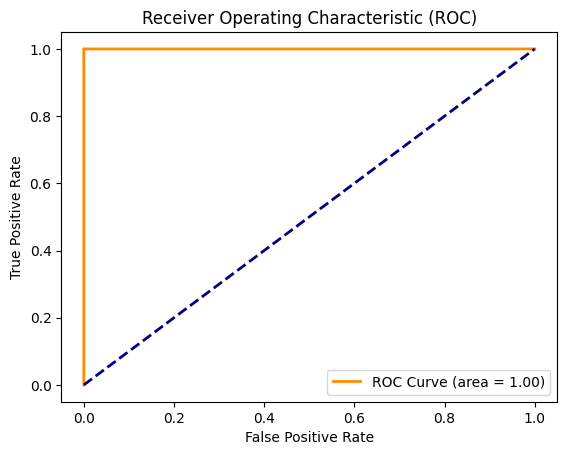

Acurácia média em Cross Validation: 0.8619

Importância das Variáveis:
1. Feature 0 (0.4105048765662941)
2. Feature 14 (0.12547152070506248)
3. Feature 10 (0.0845494534258864)
4. Feature 4 (0.07609856811249802)
5. Feature 12 (0.07388603998541138)
6. Feature 17 (0.055099747529112265)
7. Feature 16 (0.03779438986133772)
8. Feature 11 (0.035141626129048115)
9. Feature 3 (0.027235783742710698)
10. Feature 9 (0.020922052883550677)
11. Feature 2 (0.014160923571016816)
12. Feature 18 (0.006055828722936527)
13. Feature 21 (0.005094382795077992)
14. Feature 5 (0.0036720342254657145)
15. Feature 27 (0.0034226214477657076)
16. Feature 19 (0.0032305862274224083)
17. Feature 7 (0.0029711002680080883)
18. Feature 8 (0.002925551073386437)
19. Feature 1 (0.002101100251407996)
20. Feature 20 (0.0012674290838396152)
21. Feature 28 (0.0011927720551159068)
22. Feature 6 (0.0010638992048568282)
23. Feature 23 (0.001021739597785573)
24. Feature 15 (0.001017639709616657)
25. Feature 26 (0.0009356688341066094

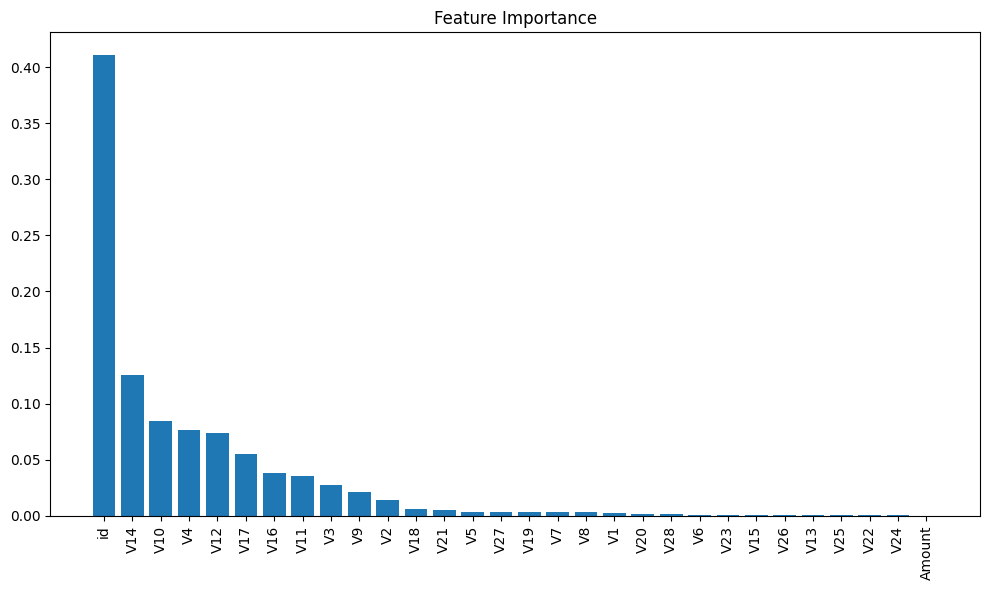

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset
data = pd.read_csv("creditcard/creditcard_2023.csv")

# Separar recursos e rótulo
X = data.drop("Class", axis=1)  # 'Class' é a variável alvo (0: legítimo, 1: fraudulento)
y = data["Class"]

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balancear os dados usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calcular a Curva ROC e AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotar a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Avaliar o modelo com validação cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Acurácia média em Cross Validation: {np.mean(cv_scores):.4f}")

# Exibir a importância das variáveis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Exibir as features mais importantes
print("\nImportância das Variáveis:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Ajuste de Hiperparâmetros com RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_resampled, y_resampled)

print(f"\nMelhores parâmetros: {random_search.best_params_}")

# Avaliar o modelo ajustado
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Explicação do modelo com SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plotar o gráfico SHAP
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Salvar o modelo treinado
joblib.dump(best_model, 'random_forest_model.pkl')

# Carregar o modelo salvo
loaded_model = joblib.load('random_forest_model.pkl')

Connected to Python 3.12.1


c:\Users\monte\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Matriz de Confusão:
[[56744     6]
 [   14 56962]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



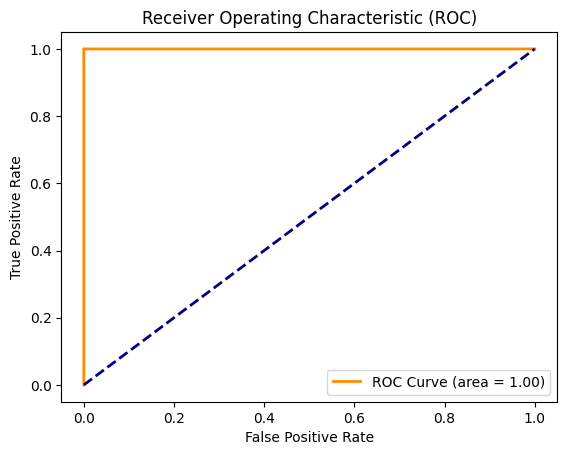

Acurácia média em Cross Validation: 0.8619

Importância das Variáveis:
1. Feature 0 (0.4105048765662941)
2. Feature 14 (0.12547152070506248)
3. Feature 10 (0.0845494534258864)
4. Feature 4 (0.07609856811249802)
5. Feature 12 (0.07388603998541138)
6. Feature 17 (0.055099747529112265)
7. Feature 16 (0.03779438986133772)
8. Feature 11 (0.035141626129048115)
9. Feature 3 (0.027235783742710698)
10. Feature 9 (0.020922052883550677)
11. Feature 2 (0.014160923571016816)
12. Feature 18 (0.006055828722936527)
13. Feature 21 (0.005094382795077992)
14. Feature 5 (0.0036720342254657145)
15. Feature 27 (0.0034226214477657076)
16. Feature 19 (0.0032305862274224083)
17. Feature 7 (0.0029711002680080883)
18. Feature 8 (0.002925551073386437)
19. Feature 1 (0.002101100251407996)
20. Feature 20 (0.0012674290838396152)
21. Feature 28 (0.0011927720551159068)
22. Feature 6 (0.0010638992048568282)
23. Feature 23 (0.001021739597785573)
24. Feature 15 (0.001017639709616657)
25. Feature 26 (0.0009356688341066094

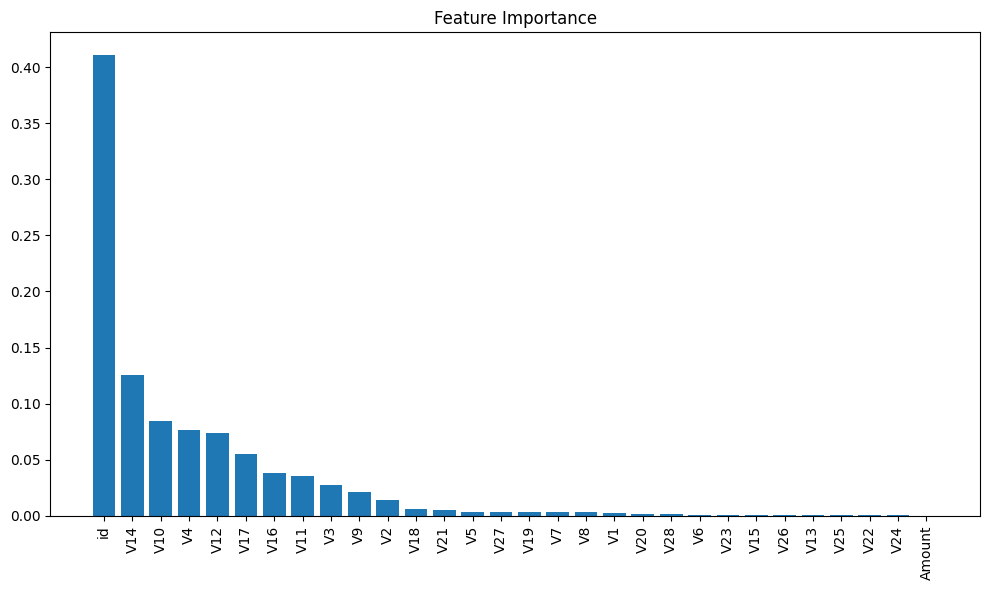

In [ ]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar dataset
data = pd.read_csv("creditcard/creditcard_2023.csv")

# Separar recursos e rótulo
X = data.drop("Class", axis=1)  # 'Class' é a variável alvo (0: legítimo, 1: fraudulento)
y = data["Class"]

# Escalonar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir o dataset em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Balancear os dados usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Treinar o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_resampled, y_resampled)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Calcular a Curva ROC e AUC
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plotar a Curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Avaliar o modelo com validação cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Acurácia média em Cross Validation: {np.mean(cv_scores):.4f}")

# Exibir a importância das variáveis
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Exibir as features mais importantes
print("\nImportância das Variáveis:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plotar a importância das features
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Ajuste de Hiperparâmetros com RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
random_search.fit(X_resampled, y_resampled)

print(f"\nMelhores parâmetros: {random_search.best_params_}")

# Avaliar o modelo ajustado
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

# Explicação do modelo com SHAP
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plotar o gráfico SHAP
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

# Salvar o modelo treinado
joblib.dump(best_model, 'random_forest_model.pkl')

# Carregar o modelo salvo
loaded_model = joblib.load('random_forest_model.pkl')

In [ ]:
df = pd.r